# <center> Kafeel Ahmad Butt <br><br> (SP16-BCS-187) <center>

#  Gender Identification Problem 

In this tutorial we will go through all the phases of Machine Learning keeping in view the example of Gender Identification.

# Step 1: Importing the Libraries 


In [1]:
import re
import string
import scipy
import pickle
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import *
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from prettytable import PrettyTable
from astropy.table import Table, Column
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


# Step 2 : Read, Understand and Pre Process Train/ Test Data

## Step 2.1 : Read the Data

In [2]:
data1 = pd.read_csv('train.csv')
data2 = pd.read_csv('test.csv')


## Step 2.2 : Understand the Data

### Train Data Set

In [3]:
print('Train Dataset:\n')
Matrix = pd.DataFrame(data1)
Matrix

Train Dataset:



,height,weight,hair,beard,scarf,gender
0,180.3000,196,Bald,Yes,No,Male
1,170.0000,120,Long,No,No,Female
2,178.5000,200,Short,No,No,Male
3,163.4000,110,Medium,No,Yes,Female
4,175.2222,220,Short,Yes,No,Male
5,165.0000,150,Medium,No,Yes,Female


In [4]:
print('\nTrain Dataset Columns:\n')
print( data1.columns)
print('\nNumber of instances in Train set')
print('\nTrain instances: ' + str(data1.index.max() + 1))


Train Dataset Columns:

Index(['height', 'weight', 'hair', 'beard', 'scarf', 'gender'], dtype='object')

Number of instances in Train set

Train instances: 6


### Test DataSet

In [5]:
print('Test Dataset:\n')
Matrix = pd.DataFrame(data2)
Matrix

Test Dataset:



,height,weight,hair,beard,scarf,gender
0,179.1,185,Long,Yes,No,Male
1,160.5,130,Short,No,No,Female
2,177.8,160,Bald,No,No,Male
3,161.1,100,Medium,No,No,Female


In [6]:
print('\nTest Dataset Columns:\n')
print( data2.columns)
print('\nNumber of instances in Test set')
print('\nTest instances: ' + str(data2.index.max() + 1))


Test Dataset Columns:

Index(['height', 'weight', 'hair', 'beard', 'scarf', 'gender'], dtype='object')

Number of instances in Test set

Test instances: 4


In [7]:
print('Train Instances having label \'Male\':\n')

print(data1.loc[data1['gender'] == 'Male'])


Train Instances having label 'Male':

     height  weight   hair beard scarf gender
0  180.3000     196   Bald   Yes    No   Male
2  178.5000     200  Short    No    No   Male
4  175.2222     220  Short   Yes    No   Male


In [8]:
print('Train Instances having label \'Female\':\n')

print(data1.loc[data1['gender'] == 'Female'])

Train Instances having label 'Female':

   height  weight    hair beard scarf  gender
1   170.0     120    Long    No    No  Female
3   163.4     110  Medium    No   Yes  Female
5   165.0     150  Medium    No   Yes  Female


In [9]:
print('Test Instances having label \'Male\':\n')

print(data2.loc[data2['gender'] == 'Male'])

Test Instances having label 'Male':

   height  weight  hair beard scarf gender
0   179.1     185  Long   Yes    No   Male
2   177.8     160  Bald    No    No   Male


In [10]:
print('Test Instances having label \'Female\':\n')

print(data2.loc[data2['gender'] == 'Female'])

Test Instances having label 'Female':

   height  weight    hair beard scarf  gender
1   160.5     130   Short    No    No  Female
3   161.1     100  Medium    No    No  Female


### Graphs Are Easy !!

Total number of 'Males' and 'Females' in Train Dataset: 


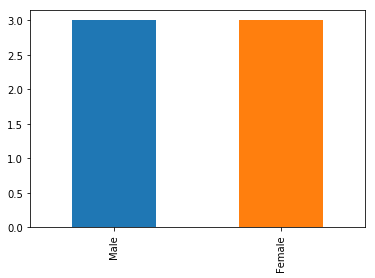

In [11]:
print('Total number of \'Males\' and \'Females\' in Train Dataset: ')
data1['gender'].value_counts().plot(kind='bar')

Total number of 'Males' and 'Females' in Test Dataset: 


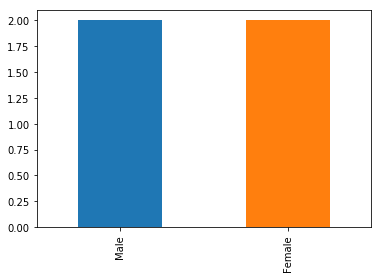

In [12]:
print('Total number of \'Males\' and \'Females\' in Test Dataset: ')
data2['gender'].value_counts().plot(kind='bar')

Number of people having various hair length in Train Dataset: 


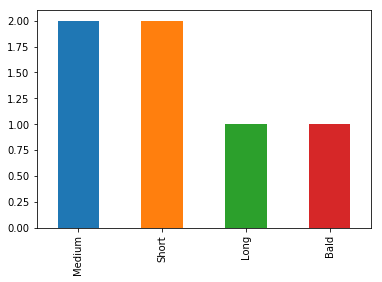

In [13]:
print('Number of people having various hair length in Train Dataset: ')
data1['hair'].value_counts().plot(kind='bar')

Number of people having various hair length in Test Dataset: 


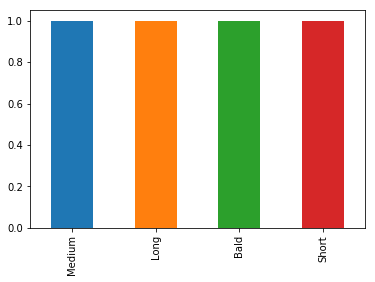

In [14]:
print('Number of people having various hair length in Test Dataset: ')
data2['hair'].value_counts().plot(kind='bar')

Number of people have/haven't beard in Train Dataset: 


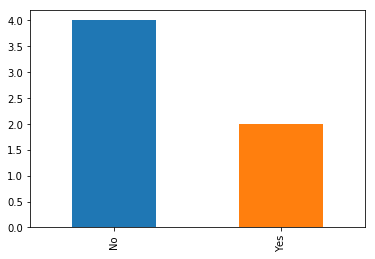

In [15]:
print('Number of people have/haven\'t beard in Train Dataset: ')
data1['beard'].value_counts().plot(kind='bar')

Number of people have/haven't beard in Test Dataset: 


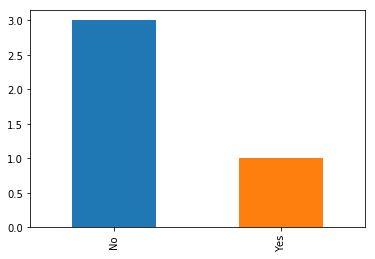

In [16]:
print('Number of people have/haven\'t beard in Test Dataset: ')
data2['beard'].value_counts().plot(kind='bar')

## Step: 2.3 Pre Process Data

In [17]:
print('Train Data before pre-processing:\n')

Matrix = pd.DataFrame(data1)
Matrix

Train Data before pre-processing:



,height,weight,hair,beard,scarf,gender
0,180.3000,196,Bald,Yes,No,Male
1,170.0000,120,Long,No,No,Female
2,178.5000,200,Short,No,No,Male
3,163.4000,110,Medium,No,Yes,Female
4,175.2222,220,Short,Yes,No,Male
5,165.0000,150,Medium,No,Yes,Female


In [18]:
print('\nTrain Data after pre-processing: \n')
data1 = data1.round(2)

Matrix = pd.DataFrame(data1)
Matrix


Train Data after pre-processing: 



,height,weight,hair,beard,scarf,gender
0,180.30,196,Bald,Yes,No,Male
1,170.00,120,Long,No,No,Female
2,178.50,200,Short,No,No,Male
3,163.40,110,Medium,No,Yes,Female
4,175.22,220,Short,Yes,No,Male
5,165.00,150,Medium,No,Yes,Female


# Step 3 : Label Encoding for Train/ Test Data

In [19]:
enc_hair = LabelEncoder()
enc_hair.fit(data1['hair'])

enc_beard = LabelEncoder()
enc_beard.fit(data1['beard'])

enc_scarf = LabelEncoder()
enc_scarf.fit(data1['scarf'])

enc_gender = LabelEncoder()
enc_gender.fit(data1['gender'])

TEMPdata1 = data1.copy()

In [20]:
print('Gender Attribute Encoding in Train Dataset: \n')
temp_var = {'gender': data1['gender'], 'encoded_gender': enc_gender.transform(data1['gender'])}
data1['gender'] = enc_gender.transform(data1['gender'])
print(pd.DataFrame(temp_var))


Gender Attribute Encoding in Train Dataset: 

   gender  encoded_gender
0    Male               1
1  Female               0
2    Male               1
3  Female               0
4    Male               1
5  Female               0


In [21]:
print('Scarf Attribute Encoding in Train Dataset: \n')
temp_var = {'scarf': data1['scarf'], 'encoded_scarf': enc_scarf.transform(data1['scarf'])}
data1['scarf'] = enc_scarf.transform(data1['scarf'])
print(pd.DataFrame(temp_var))

Scarf Attribute Encoding in Train Dataset: 

  scarf  encoded_scarf
0    No              0
1    No              0
2    No              0
3   Yes              1
4    No              0
5   Yes              1


In [22]:
print('Beard Attribute Encoding in Train Dataset: \n')
temp_var = {'beard': data1['beard'], 'encoded_beard': enc_beard.transform(data1['beard'])}
data1['beard'] = enc_beard.transform(data1['beard'])
print(pd.DataFrame(temp_var))

Beard Attribute Encoding in Train Dataset: 

  beard  encoded_beard
0   Yes              1
1    No              0
2    No              0
3    No              0
4   Yes              1
5    No              0


In [23]:
print('Hair Attribute Encoding in Train Dataset: \n')
temp_var = {'hair': data1['hair'], 'encoded_hair': enc_hair.transform(data1['hair'])}
data1['hair'] = enc_hair.transform(data1['hair'])
print(pd.DataFrame(temp_var))

Hair Attribute Encoding in Train Dataset: 

     hair  encoded_hair
0    Bald             0
1    Long             1
2   Short             3
3  Medium             2
4   Short             3
5  Medium             2


In [24]:
print('Original Train Data: \n')

Matrix = pd.DataFrame(TEMPdata1)
Matrix

Original Train Data: 



,height,weight,hair,beard,scarf,gender
0,180.30,196,Bald,Yes,No,Male
1,170.00,120,Long,No,No,Female
2,178.50,200,Short,No,No,Male
3,163.40,110,Medium,No,Yes,Female
4,175.22,220,Short,Yes,No,Male
5,165.00,150,Medium,No,Yes,Female


In [25]:
print('\nTrain Data After Label Encoding: \n ')

Matrix = pd.DataFrame(data1)
Matrix


Train Data After Label Encoding: 
 


,height,weight,hair,beard,scarf,gender
0,180.30,196,0,1,0,1
1,170.00,120,1,0,0,0
2,178.50,200,3,0,0,1
3,163.40,110,2,0,1,0
4,175.22,220,3,1,0,1
5,165.00,150,2,0,1,0


In [26]:
TEMPdata2 = data2.copy()

data2['hair'] = enc_hair.transform(data2['hair'])
data2['scarf'] = enc_scarf.transform(data2['scarf'])
data2['beard'] = enc_beard.transform(data2['beard'])
data2['gender'] = enc_gender.transform(data2['gender'])

In [27]:
print('Original Test Data:\n ')

Matrix = pd.DataFrame(TEMPdata2)
Matrix

Original Test Data:
 


,height,weight,hair,beard,scarf,gender
0,179.1,185,Long,Yes,No,Male
1,160.5,130,Short,No,No,Female
2,177.8,160,Bald,No,No,Male
3,161.1,100,Medium,No,No,Female


In [28]:
print('\nTest Data After Label Encoding: \n')

Matrix = pd.DataFrame(data2)
Matrix


Test Data After Label Encoding: 



,height,weight,hair,beard,scarf,gender
0,179.1,185,1,1,0,1
1,160.5,130,3,0,0,0
2,177.8,160,0,0,0,1
3,161.1,100,2,0,0,0


# Step 4 : Features Extraction
The features are already extracted for this example.

 # Step 5 : Train ML Algorithms using Train Data

In [29]:
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
linear_svc = LinearSVC()
bernoulli_nb = BernoulliNB()

In [30]:
print('Parameters and their values:\n')
print(logistic_regression.fit(data1.iloc[0:6, 0:5], data1.iloc[0:6, 5]))

Parameters and their values:

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [31]:
print('Parameters and their values:\n')
print(random_forest.fit(data1.iloc[0:6, 0:5], data1.iloc[0:6, 5]))

Parameters and their values:

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [32]:
print('Parameters and their values:\n')
print(linear_svc.fit(data1.iloc[0:6, 0:5], data1.iloc[0:6, 5]))

Parameters and their values:

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


In [33]:
print('Parameters and their values:\n')
print(bernoulli_nb.fit(data1.iloc[0:6, 0:5], data1.iloc[0:6, 5]))

Parameters and their values:

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


# Step 6: Evaluate ML Algorithms using Test Data

In [34]:
predict_logistic_regression = logistic_regression.predict(data2.iloc[0:6, 0:5])
print('Prediction using Logistic Regression: \n')
temp_frame = pd.DataFrame({'predicted_gender': enc_gender.inverse_transform(predict_logistic_regression)})
print(pd.concat([TEMPdata2, temp_frame], axis=1))
print('\nAccuracy Score = ' + str(accuracy_score(data2.iloc[0:6, 5], predict_logistic_regression)))

Prediction using Logistic Regression: 

   height  weight    hair beard scarf  gender predicted_gender
0   179.1     185    Long   Yes    No    Male             Male
1   160.5     130   Short    No    No  Female           Female
2   177.8     160    Bald    No    No    Male           Female
3   161.1     100  Medium    No    No  Female           Female

Accuracy Score = 0.75


In [35]:
predict_random_forest = random_forest.predict(data2.iloc[0:6, 0:5])
print('Prediction using Random Forest Classifier:\n')
temp_frame = pd.DataFrame({'predicted_gender': enc_gender.inverse_transform(predict_random_forest)})
print(pd.concat([TEMPdata2, temp_frame], axis=1))
print('\nAccuracy Score = ' + str(accuracy_score(data2.iloc[0:6, 5], predict_random_forest)))

Prediction using Random Forest Classifier:

   height  weight    hair beard scarf  gender predicted_gender
0   179.1     185    Long   Yes    No    Male             Male
1   160.5     130   Short    No    No  Female           Female
2   177.8     160    Bald    No    No    Male             Male
3   161.1     100  Medium    No    No  Female           Female

Accuracy Score = 1.0


In [36]:
predict_linear_svc = linear_svc.predict(data2.iloc[0:6, 0:5])
print('Prediction using LinearSVC:\n')
temp_frame = pd.DataFrame({'predicted_gender': enc_gender.inverse_transform(predict_linear_svc)})

print(pd.concat([TEMPdata2, temp_frame], axis=1))
print('\nAccuracy Score = ' + str(accuracy_score(data2.iloc[0:6, 5], predict_linear_svc)))

Prediction using LinearSVC:

   height  weight    hair beard scarf  gender predicted_gender
0   179.1     185    Long   Yes    No    Male             Male
1   160.5     130   Short    No    No  Female           Female
2   177.8     160    Bald    No    No    Male           Female
3   161.1     100  Medium    No    No  Female           Female

Accuracy Score = 0.75


In [37]:
predict_bernoulli_nb = bernoulli_nb.predict(data2.iloc[0:6, 0:5])
print('Prediction using BernoulliNB:\n')
temp_frame = pd.DataFrame({'predicted_gender': enc_gender.inverse_transform(predict_bernoulli_nb)})
print(pd.concat([TEMPdata2, temp_frame], axis=1))
print('\nAccuracy Score = ' + str(accuracy_score(data2.iloc[0:6, 5], predict_bernoulli_nb)))

Prediction using BernoulliNB:

   height  weight    hair beard scarf  gender predicted_gender
0   179.1     185    Long   Yes    No    Male             Male
1   160.5     130   Short    No    No  Female           Female
2   177.8     160    Bald    No    No    Male             Male
3   161.1     100  Medium    No    No  Female           Female

Accuracy Score = 1.0


# Step 7 : Selection of Best Model 

In [38]:
pretty_table = PrettyTable()
pretty_table.field_names = ['Model', 'Accuracy']
pretty_table.add_row(['LogisticRegression', accuracy_score(data2.iloc[0:6, 5], predict_logistic_regression)])
pretty_table.add_row(['RandomForestClassifier', accuracy_score(data2.iloc[0:6, 5], predict_random_forest)])
pretty_table.add_row(['LinearSVC', accuracy_score(data2.iloc[0:6, 5], predict_linear_svc)])
pretty_table.add_row(['BernoulliNB', accuracy_score(data2.iloc[0:6, 5], predict_bernoulli_nb)])

print('Detailed Performance of all the Models.')
print('=======================================')
print(pretty_table)

pretty_table = PrettyTable()
pretty_table.field_names = ['Model', 'Accuracy']
pretty_table.add_row(['RandomForestClassifier', accuracy_score(data2.iloc[0:6, 5], predict_random_forest)])

print('\nBest Model.')
print('=======================================')
print(pretty_table)

Detailed Performance of all the Models.
+------------------------+----------+
|         Model          | Accuracy |
+------------------------+----------+
|   LogisticRegression   |   0.75   |
| RandomForestClassifier |   1.0    |
|       LinearSVC        |   0.75   |
|      BernoulliNB       |   1.0    |
+------------------------+----------+

Best Model.
+------------------------+----------+
|         Model          | Accuracy |
+------------------------+----------+
| RandomForestClassifier |   1.0    |
+------------------------+----------+


# Step 8 : Application Phase

## Step 8.1 : Combine Data (Train + Test)

In [39]:
print('Train Features in form of DataFrame: \n')

Matrix = pd.DataFrame(data1)
Matrix

Train Features in form of DataFrame: 



,height,weight,hair,beard,scarf,gender
0,180.30,196,0,1,0,1
1,170.00,120,1,0,0,0
2,178.50,200,3,0,0,1
3,163.40,110,2,0,1,0
4,175.22,220,3,1,0,1
5,165.00,150,2,0,1,0


In [40]:
print('Test Features in form of DataFrame: \n')
print(data2)

Test Features in form of DataFrame: 

   height  weight  hair  beard  scarf  gender
0   179.1     185     1      1      0       1
1   160.5     130     3      0      0       0
2   177.8     160     0      0      0       1
3   161.1     100     2      0      0       0


In [41]:
print('All features in form of data frame\n')
data3 = pd.concat([data1, data2])

Matrix = pd.DataFrame(data3)
Matrix

All features in form of data frame



,height,weight,hair,beard,scarf,gender
0,180.30,196,0,1,0,1
1,170.00,120,1,0,0,0
2,178.50,200,3,0,0,1
3,163.40,110,2,0,1,0
4,175.22,220,3,1,0,1
5,165.00,150,2,0,1,0
0,179.10,185,1,1,0,1
1,160.50,130,3,0,0,0
2,177.80,160,0,0,0,1
3,161.10,100,2,0,0,0


## Step 8.2 : Train Best Model on All data

In [42]:
random_forest.fit(data3.iloc[0:6, 0:5], data3.iloc[0:6, 5])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Step 9: Make predictions on Unseen Data

## Step 9.1 : Load The Model 

## Step 9.2 : Take input from User 

In [43]:
height = float(input('Please enter your Height here (centimeter): '))
weight = int(input('Please enter your Weight here(kg): '))
hair = input('Please enter your hair Length here (Bald/Long/Medium/Short): ')
beard = input('Do you have beard? (Yes/No): ')
scarf = input('Do you have Scarf? (Yes/No): ')


Please enter your Height here (centimeter): 170
Please enter your Weight here(kg): 120
Please enter your hair Length here (Bald/Long/Medium/Short): Long
Do you have beard? (Yes/No): No
Do you have Scarf? (Yes/No): No


## Step 9.3 : Convert Input into feature vector

In [44]:
InsertedData = pd.DataFrame({'height': [height], 'weight': [weight], 'hair': [hair], 'beard': [beard], 'scarf': [scarf]})

print('\nUser input in Actual DataFrame form: ')
feature_vector = pd.DataFrame(InsertedData)
feature_vector


User input in Actual DataFrame form: 


,height,weight,hair,beard,scarf
0,170.0,120,Long,No,No


In [45]:
feature_vector['hair'] = enc_hair.transform(feature_vector['hair'])
feature_vector['beard'] = enc_beard.transform(feature_vector['beard'])
feature_vector['scarf'] = enc_scarf.fit_transform(feature_vector['scarf'])
print('User input in Encoded DataFame form: ')
feature_vector = pd.DataFrame(InsertedData)
feature_vector

User input in Encoded DataFame form: 


,height,weight,hair,beard,scarf
0,170.0,120,1,0,0


## Step 9.4 : Apply Trained Model on Feature Vector

In [46]:
predict = random_forest.predict(feature_vector)
print('Prediction: ' + str(enc_gender.inverse_transform(predict)[0]))

Prediction: Female
